In [26]:
import os
import PIL as Image
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = os.listdir('../../input/video/')

In [3]:
names

['White_Knight_BlackBG.webm',
 'Black_Pawn_BlackBG3.webm',
 'Black_Pawn_WhiteBG2.webm',
 'Black_King_WhiteBG1.webm',
 'White_Knight_WhiteBG3.webm',
 'Black_Rook_BlackBG.webm',
 'Black_Rook_WhiteBG1.webm',
 'Black_Rook_BlackBG2.webm',
 'White_Rook_WhiteBG1.webm',
 'Black_Knight_BlackBG1.webm',
 'White_Pawn_BlackBG1.webm',
 'Black_King_WhiteBG.webm',
 'Black_Bishop_WhiteBG3.webm',
 'Black_Bishop_BlackBG.webm',
 'White_King_BlackBG1.webm',
 'White_Queen_WhiteBG.webm',
 'Black_Knight_WhiteBG3.webm',
 'Black_Rook_WhiteBG.webm',
 'Black_Knight_WhiteBG.webm',
 'Black_Knight_WhiteBG1.webm',
 'White_Rook_BlackBG1.webm',
 'Black_Pawn_WhiteBG.webm',
 'Black_Knight_BLackBG.webm',
 'White_King_WhiteBG1.webm',
 'Black_King_BlackBG.webm',
 'Black_Pawn_GreenBG.webm',
 'White_Knight_WhiteBG1.webm',
 'White_Bishop_BlackBG.webm',
 'Black_Knight_WhiteBG2.webm',
 'Black_Pawn_WhiteBG1.webm',
 'Black_Queen_BlackBG.webm',
 'White_Pawn_WhiteBG1.webm',
 'White_Rook_BlackBG2.webm',
 'White_Pawn_WhiteBG.webm',
 '

In [5]:
time()

1499787909.645399

In [7]:
def divideVideo(filename, outputname, color):
    print('outputname: '+outputname)
    a, b, c = os.popen3('ffmpeg -i ../../input/video/%s' % (filename))
    out = c.read()
    dp = out.index('Duration: ')
    duration = out[dp+10:dp+out[dp:].index(",")]
    hh, mm, ss = map(float, duration.split(':'))
    total = (hh*60+mm)*60+ss
    for i in xrange(int(total)):
        t = i
        p = int(time())
        print(t)
        os.system("ffmpeg -i ../../input/video/%s -ss %i ../../input/images/%s/frame_%s_%i.png" % (
                filename, t, color, outputname, p))

In [ ]:
for idx, val in enumerate(names):
    print(val)
#     print(val.split("_"))
    color, piece, _ = val.split("_")
    divideVideo(val, "_".join(val.split("_")[:2]), color)

White_Knight_BlackBG.webm
outputname: White_Knight


/home/fjcamillo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: os.popen3 is deprecated.  Use the subprocess module.
  app.launch_new_instance()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Black_Pawn_BlackBG3.webm
outputname: Black_Pawn
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
Black_Pawn_WhiteBG2.webm
outputname: Black_Pawn
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
Black_King_WhiteBG1.webm
outputname: Black_King
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


# Convert Images into ndarrays and number values

In [22]:
import os
from PIL import Image

In [11]:
white_images = os.listdir('../../input/images/White')
black_images = os.listdir('../../input/images/Black')

In [12]:
#Number of images per folder on the color of the pieces
print('Images for White Pieces: {}'.format(len(white_images)))
print('Images for Black Pieces: {}'.format(len(black_images)))

Images for White Pieces: 357
Images for Black Pieces: 505


In [6]:
#Classes of the images
classes = {
    'black': {
        'pawn': 7,
        'bishop': 8,
        'knight': 9,
        'rook': 10,
        'queen': 11,
        'king': 12
    },
    'white': {
        'pawn': 1,
        'bishop': 2,
        'knight': 3,
        'rook': 4,
        'queen': 5,
        'king': 6
    }
}

### Data Augmentation

In [20]:
def convert_images(filename, size, name, key, label):
    img = Image.open(filename)
    img = img.resize(size)
    img.save('resized_{}_{}.png'.format(name, key))
    rotate5 = img.rotate(45)
    rotate45.save('rotate45_{}_{}.png'.format(name, key))
    rotate90 = img.rotate(90)
    rotate90.save('rotate90_{}_{}.png'.format(name, key))
    flip = img.transpose(Image.FLIP_LEFT_RIGHT)
    flip.save('flip_{}_{}.png'.format(name, key))

In [24]:
#Open the image using PIL.Image
test = Image.open('../../input/images/White/'+white_images[0])

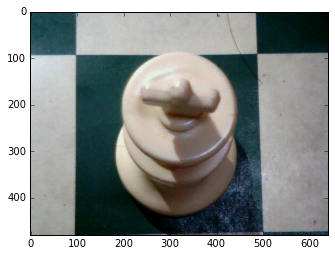

In [27]:
#Sample Image
plt.imshow(test)

### Data Labelling

In [7]:
#Function to label images:
def label_image(filename):
    name = filename.split("_")
    label = classes[name[1].lower()][name[2].lower()]
    return label, name[1].lower(), name[2].lower()

### Dataset

In [17]:
#Dataset Schema
chess12 = {
    'train_images': [],
    'test_images': [],
    'train_labels': [],
    'test_labels:': [],
    'one_hot_train_labels': [],
    'one_hot_test_labels': []
}